In [1]:
import pandas as pd
import numpy as np
from valentine import valentine_match
from valentine.algorithms import Coma
import missingno as msno
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df1 = pd.read_csv('../datasets/processed/vehicles_processed.csv')
df2 = pd.read_csv('../datasets/processed/used_cars_data_processed.csv')

/tmp/ipykernel_86786/3267167465.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../datasets/processed/used_cars_data_processed.csv')


In [3]:
print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)

Dataset 1 shape: (399883, 24)
Dataset 2 shape: (2855653, 57)


In [7]:
# Instantiate matcher and run
matcher = Coma(use_instances=True, java_xmx="16G")
matches = valentine_match(df1, df2, matcher)

display(matches)

{(('table_1', 'description'), ('table_2', 'description')): 0.70669496,
 (('table_1', 'transmission'), ('table_2', 'transmission')): 0.70363474,
 (('table_1', 'price'), ('table_2', 'price')): 0.652002,
 (('table_1', 'year'), ('table_2', 'year')): 0.65114725,
 (('table_1', 'VIN'), ('table_2', 'vin')): 0.6502242,
 (('table_1', 'type'), ('table_2', 'body_type')): 0.5605929,
 (('table_1', 'paint_color'), ('table_2', 'listing_color')): 0.5292534,
 (('table_1', 'model'), ('table_2', 'model_name')): 0.5285753,
 (('table_1', 'cylinders'), ('table_2', 'engine_cylinders')): 0.50093234,
 (('table_1', 'long'), ('table_2', 'longitude')): 0.41985145,
 (('table_1', 'manufacturer'), ('table_2', 'make_name')): 0.41466492,
 (('table_1', 'lat'), ('table_2', 'latitude')): 0.3933501,
 (('table_1', 'id'), ('table_2', 'sp_id')): 0.39108694,
 (('table_1', 'posting_date'), ('table_2', 'listed_date')): 0.372916,
 (('table_1', 'drive'), ('table_2', 'trim_name')): 0.3539588,
 (('table_1', 'title_status'), ('table_

In [8]:
# Il risultato ottenuto da COMA
coma_results = {(('table_1', 'description'), ('table_2', 'description')): 0.70669496, (('table_1', 'transmission'), ('table_2', 'transmission')): 0.70363474, (('table_1', 'price'), ('table_2', 'price')): 0.652002, (('table_1', 'year'), ('table_2', 'year')): 0.65114725, (('table_1', 'VIN'), ('table_2', 'vin')): 0.6502242, (('table_1', 'type'), ('table_2', 'body_type')): 0.5605929, (('table_1', 'paint_color'), ('table_2', 'listing_color')): 0.5292534, (('table_1', 'model'), ('table_2', 'model_name')): 0.5285753, (('table_1', 'cylinders'), ('table_2', 'engine_cylinders')): 0.50093234, (('table_1', 'long'), ('table_2', 'longitude')): 0.41985145, (('table_1', 'manufacturer'), ('table_2', 'make_name')): 0.41466492, (('table_1', 'lat'), ('table_2', 'latitude')): 0.3933501, (('table_1', 'id'), ('table_2', 'sp_id')): 0.39108694, (('table_1', 'posting_date'), ('table_2', 'listed_date')): 0.372916, (('table_1', 'drive'), ('table_2', 'trim_name')): 0.3539588, (('table_1', 'title_status'), ('table_2', 'theft_title')): 0.32001543, (('table_1', 'odometer'), ('table_2', 'power')): 0.30869272}

# 1. Estrarre le liste degli attributi coinvolti nel matching
# Nota: usiamo un set per evitare duplicati se una colonna è stata matchata più volte
cols_match_df1 = set([key[0][1] for key in coma_results.keys()])
cols_match_df2 = set([key[1][1] for key in coma_results.keys()])

# 2. Identificare le colonne rimanenti sottraendo quelle matchate dal totale
# Assumendo che df1 e df2 siano i tuoi DataFrame puliti (senza le colonne > 70% missing)
remaining_df1 = [c for c in df1.columns if c not in cols_match_df1]
remaining_df2 = [c for c in df2.columns if c not in cols_match_df2]

print(f"--- Dataset 1 (Table 1) ---")
print(f"Matchate ({len(cols_match_df1)}): {sorted(list(cols_match_df1))}")
print(f"Rimanenti ({len(remaining_df1)}): {remaining_df1}")

print(f"\n--- Dataset 2 (Table 2) ---")
print(f"Matchate ({len(cols_match_df2)}): {sorted(list(cols_match_df2))}")
print(f"Rimanenti ({len(remaining_df2)}): {remaining_df2}")

--- Dataset 1 (Table 1) ---
Matchate (17): ['VIN', 'cylinders', 'description', 'drive', 'id', 'lat', 'long', 'manufacturer', 'model', 'odometer', 'paint_color', 'posting_date', 'price', 'title_status', 'transmission', 'type', 'year']
Rimanenti (7): ['url', 'region', 'region_url', 'condition', 'fuel', 'image_url', 'state']

--- Dataset 2 (Table 2) ---
Matchate (17): ['body_type', 'description', 'engine_cylinders', 'latitude', 'listed_date', 'listing_color', 'longitude', 'make_name', 'model_name', 'power', 'price', 'sp_id', 'theft_title', 'transmission', 'trim_name', 'vin', 'year']
Rimanenti (40): ['back_legroom', 'city', 'city_fuel_economy', 'daysonmarket', 'dealer_zip', 'engine_displacement', 'engine_type', 'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab', 'is_new', 'length', 'listing_id', 'main_picture_url', 'majo

In [3]:
# Rimuoviamo dai due dataset le colonne non puramente descrittive delle entità ma piuttosto delle sorgenti 
df1_features_removed = {'url', 'region_url', 'image_url'}
df2_features_removed = {'engine_type', 'listing_id', 'main_picture_url'}

df1 = df1.drop(columns=df1_features_removed)
df2 = df2.drop(columns=df2_features_removed)

In [4]:
# Mapping delle colonne tra i due dataset per la generazione dello schema mediato
mapping_df1 = {
    'VIN': 'vin',
    'id': 'id_source_vehicles',
    'type': 'body_type',
    'paint_color': 'main_color',
    'long': 'longitude',
    'lat': 'latitude',
    'posting_date': 'pubblication_date',
    'drive': 'traction',
    'title_status': 'status',
    'odometer': 'mileage',
    'fuel': 'fuel_type',
    'region': 'location'
}

mapping_df2 = {
    'make_name': 'manufacturer',
    'model_name': 'model',
    'listing_color': 'main_color',
    'sp_id': 'id_source_used_cars',
    'engine_cylinders': 'cylinders',
    'listed_date': 'pubblication_date',
    'wheel_system': 'traction',
    'theft_title': 'theft_status',
    'city' : 'location',
}


In [5]:
# 1. Rinomina le colonne nei dataset originali
df1_mapped = df1.rename(columns=mapping_df1)
df2_mapped = df2.rename(columns=mapping_df2)

# 2. Unione dei dataset (Stacking)
# pd.concat allineerà automaticamente le colonne con lo stesso nome
# e aggiungerà NaN dove la colonna esiste solo in uno dei due
mediated_dataset = pd.concat([df1_mapped, df2_mapped], ignore_index=True)


# 3. Aggiungi una colonna sorgente (utile per il record linkage futuro)
df1_mapped['source_dataset'] = 'dataset_1'
df2_mapped['source_dataset'] = 'dataset_2'

# Rieseguiamo il concat con la sorgente
df_mediated = pd.concat([df1_mapped, df2_mapped], ignore_index=True)

print(f"Dimensioni schema mediato: {df_mediated.shape}")

Dimensioni schema mediato: (3255536, 59)


In [10]:
df_mediated['source_dataset'].value_counts()

source_dataset
dataset_2    2855653
dataset_1     399883
Name: count, dtype: int64

In [8]:
df_mediated.head()

,id_source_vehicles,location,price,year,manufacturer,model,condition,cylinders,fuel_type,mileage,status,transmission,vin,traction,body_type,main_color,description,state,latitude,longitude,pubblication_date,source_dataset,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,length,major_options,maximum_seating,owner_count,power,salvage,savings_amount,seller_rating,id_source_used_cars,sp_name,theft_status,torque,transmission_display,trimId,trim_name,wheel_system_display,wheelbase,width
0,7.316815e+09,auburn,33590.0,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:18-0500,dataset_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.316815e+09,auburn,22590.0,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:08-0500,dataset_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.316815e+09,auburn,39590.0,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:25-0500,dataset_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.316743e+09,auburn,30990.0,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T10:41:31-0500,dataset_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.316356e+09,auburn,15000.0,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03T14:02:03-0500,dataset_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


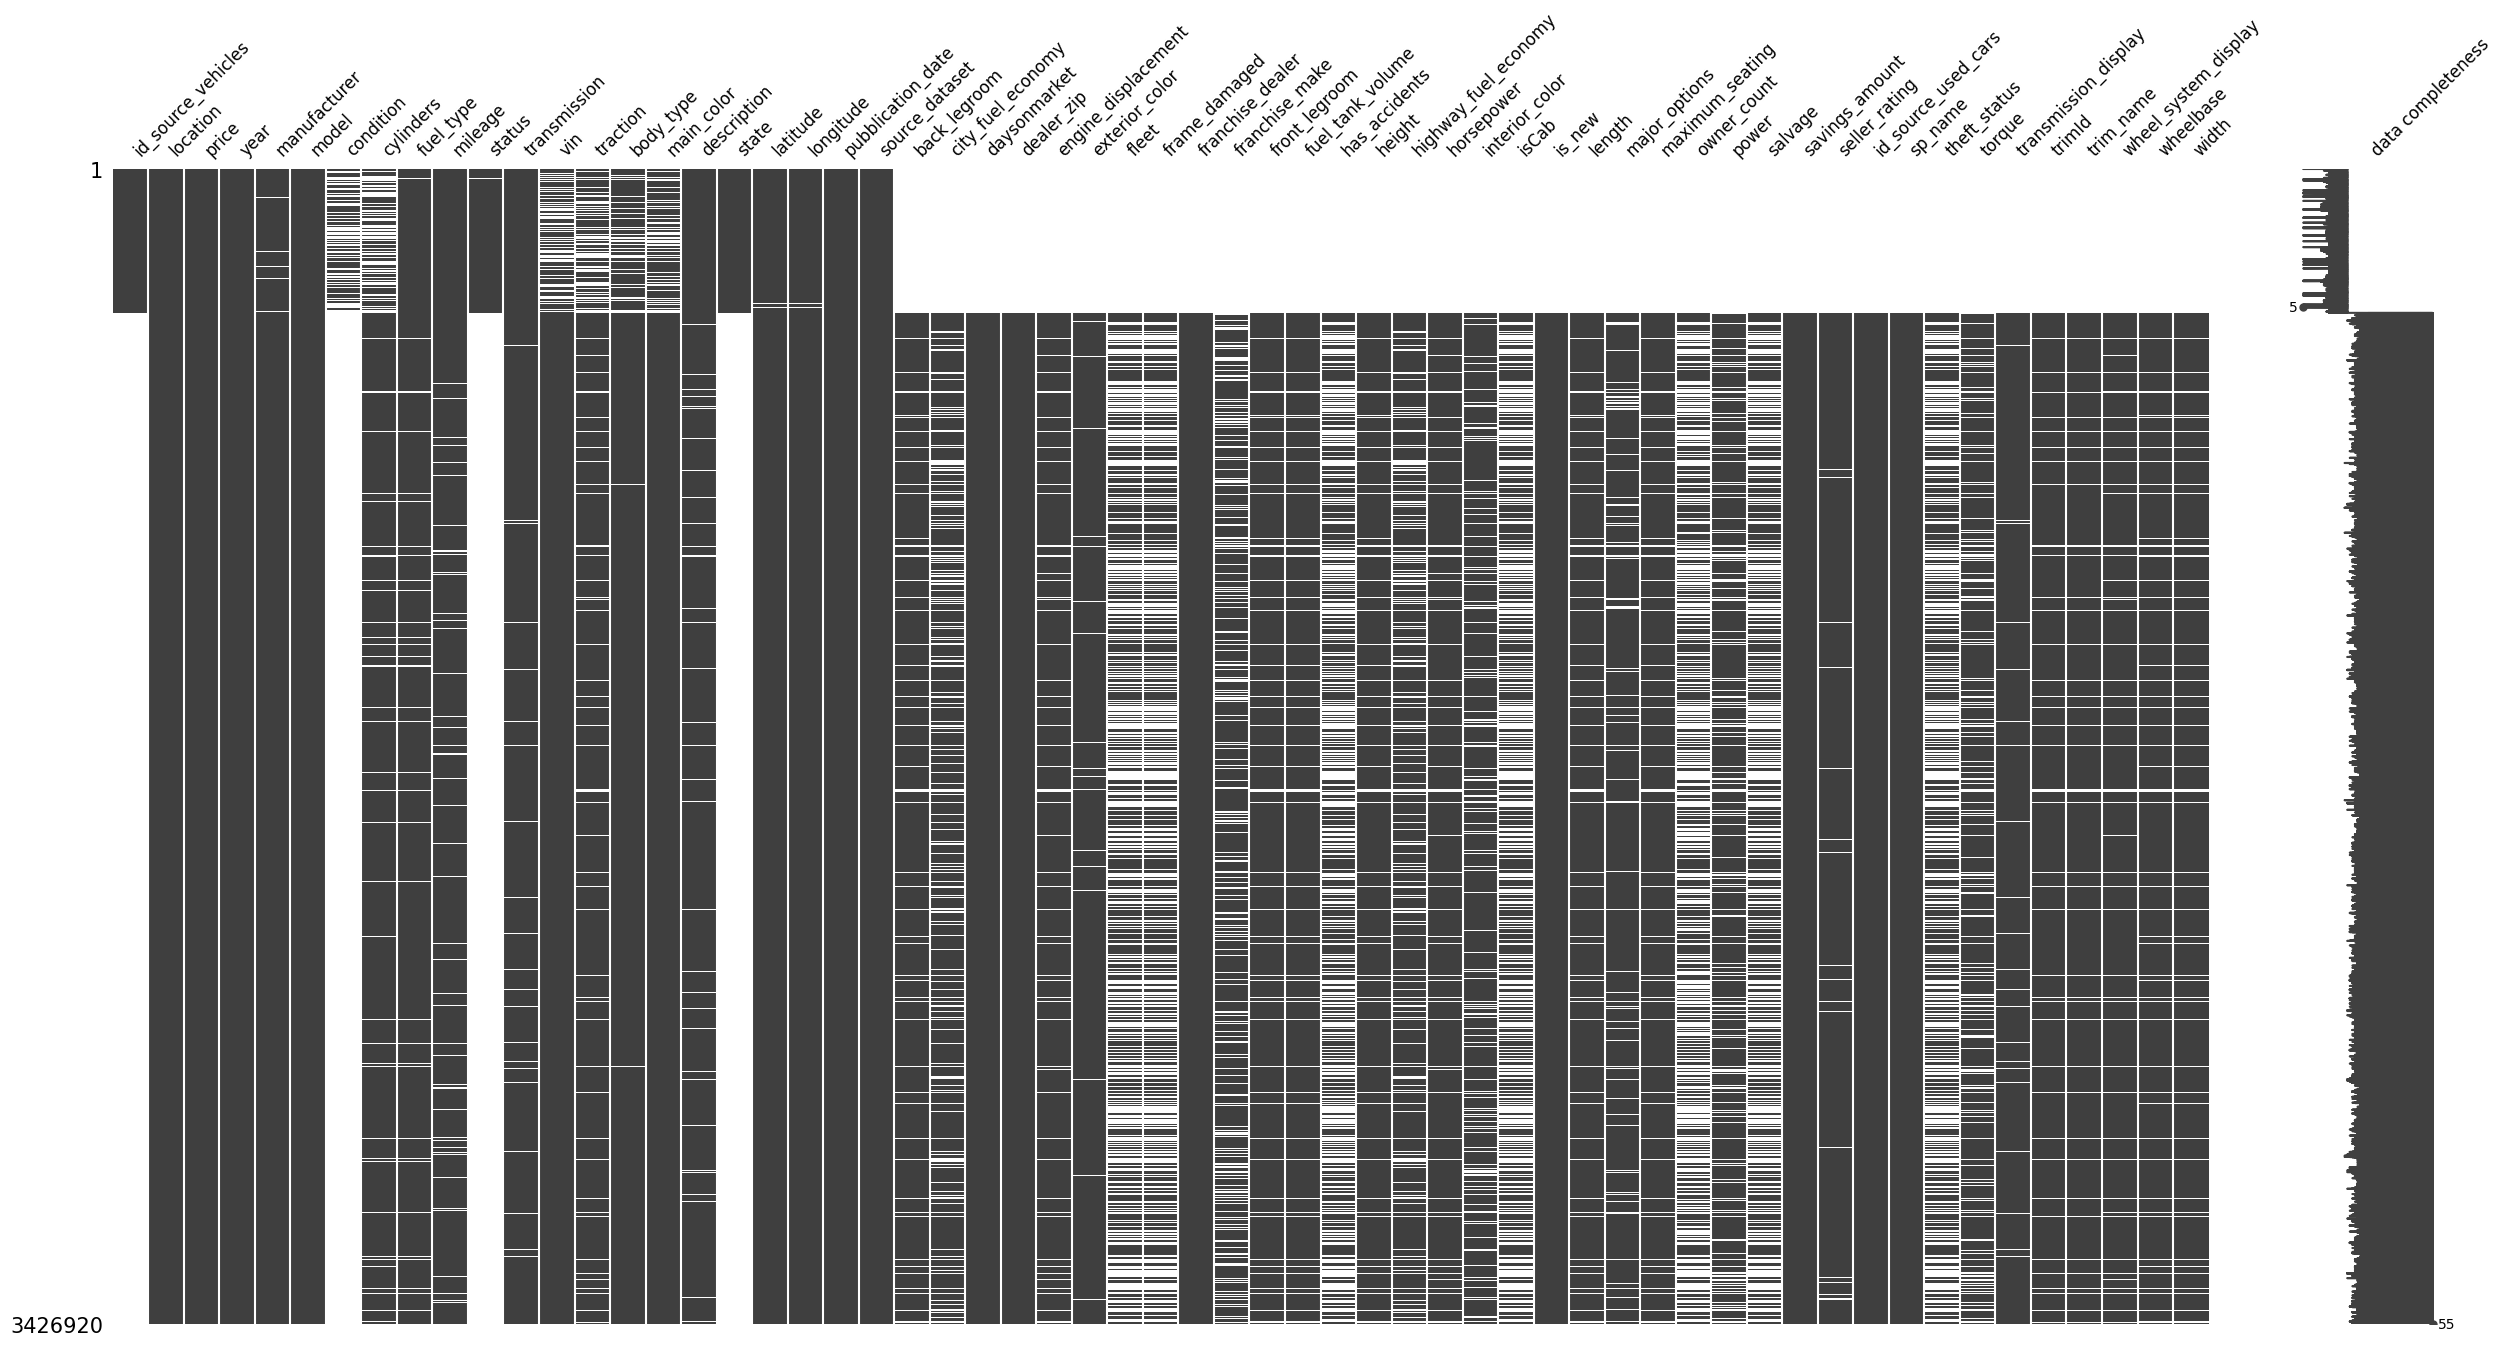

In [8]:
# Visualizzo il grafico dei missing values
msno.matrix(df_mediated, figsize=(30, 15), fontsize=12, labels=True)
plt.show()

In [6]:
# Manteniamo solo le colonne coinvolte nel matching
# Le altre colonne risulterebbero inutili per il record linkage
colonne_in_match = [
    'id_source_vehicles', 'id_source_used_cars', 'location', 'price', 'year', 'manufacturer', 'model', 'cylinders',
    'fuel_type', 'mileage', 'transmission', 'vin', 'traction', 'body_type', 'main_color', 'description', 'latitude',
    'longitude', 'pubblication_date', 'source_dataset'
]

df_mediated_cleaned = df_mediated[colonne_in_match]

df_mediated_cleaned.shape

(3255536, 20)

In [7]:
# Separiamo nuovamente i due dataset mediati per future operazioni di record linkage
# Le singole sorgenti vengono allineate allo schema mediato
df1_mediated = df_mediated_cleaned[df_mediated_cleaned['source_dataset'] == 'dataset_1']
df2_mediated = df_mediated_cleaned[df_mediated_cleaned['source_dataset'] == 'dataset_2']

df1_mediated = df1_mediated.drop(columns=['source_dataset', 'id_source_used_cars'])
df2_mediated = df2_mediated.drop(columns=['source_dataset', 'id_source_vehicles'])

df1_mediated = df1_mediated.reset_index(drop=True)
df2_mediated = df2_mediated.reset_index(drop=True)

df1_mediated.rename(columns={'id_source_vehicles': 'id'}, inplace=True)
df2_mediated.rename(columns={'id_source_used_cars': 'id'}, inplace=True)

In [8]:
display(df1_mediated.shape)
display(df2_mediated.shape)

(399883, 18)

(2855653, 18)

In [9]:
# Normalizzazione  dei record universale per Record Linkage, Dedupe e DITTO

def normalizzazione_universale(df):
    """
    Normalizza il dataset per Record Linkage, Dedupe e DITTO evitando errori su valori nulli.
    """
    df_norm = df.copy()
    
    colonne_testo = [
        'location', 'manufacturer', 'model', 'fuel_type', 
        'transmission', 'traction', 'body_type', 'main_color', 'cylinders'
    ]
    
    # Funzione di supporto per pulire il testo in modo sicuro
    def clean_text_safe(x):
        # Se il valore è nullo (NaN), None o una stringa che indica nullità, restituisci None
        if pd.isna(x) or str(x).lower() in ['nan', 'none', '']:
            return None
        
        # Conversione in stringa, minuscolo e rimozione spazi esterni
        s = str(x).lower().strip()
        # Rimozione caratteri speciali (mantenendo solo alfanumerici e spazi)
        s = re.sub(r'[^a-z0-9\s]', '', s)
        # Compattazione spazi multipli
        s = re.sub(r'\s+', ' ', s).strip()
        
        # Se dopo la pulizia la stringa è vuota, meglio restituire None
        return s if s != '' else None

    # Applicazione della pulizia alle colonne testuali
    for col in colonne_testo:
        if col in df_norm.columns:            
            df_norm[col] = df_norm[col].apply(clean_text_safe)

    # 2. Pulizia specifica per la colonna 'description'
    if 'description' in df_norm.columns:
        def clean_description_safe(x):
            if pd.isna(x) or str(x).lower() in ['nan', 'none', '']:
                return None
            
            s = str(x).lower()
            # Rimuove URL
            s = re.sub(r'http\S+|www\S+|https\S+', '', s, flags=re.MULTILINE)
            # Rimuove caratteri speciali pesanti
            s = re.sub(r'[^a-z0-9\s]', ' ', s)
            # Compatta spazi
            s = re.sub(r'\s+', ' ', s).strip()
            return s if s != '' else None

        df_norm['description'] = df_norm['description'].apply(clean_description_safe)

    # 3. Normalizzazione numerica (fondamentale per Dedupe e Record Linkage)
    colonne_numeriche = ['year', 'price', 'mileage']
    for col in colonne_numeriche:
        if col in df_norm.columns:
            df_norm[col] = pd.to_numeric(df_norm[col], errors='coerce')

    return df_norm

In [10]:
# --- APPLICAZIONE ---

# Applichiamo ai dataset di partenza (già sanificati nel VIN)
df1_mediated_norm = normalizzazione_universale(df1_mediated)
df2_mediated_norm = normalizzazione_universale(df2_mediated)

In [13]:
df1_inference = df1_mediated_norm.drop(columns=['vin'])
df2_inference = df2_mediated_norm.drop(columns=['vin'])

df1_inference.to_csv('../datasets/mediated_schema/df1_inference.csv', index=False)
df2_inference.to_csv('../datasets/mediated_schema/df2_inference.csv', index=False)

In [14]:
# Pulizia dei record con valore VIN non corretti, per la generazione della Ground Truth

def is_valid_vin_checksum(vin):
    """
    Algoritmo ufficiale per la validazione della 9a cifra (Check Digit) del VIN.
    """
    if not isinstance(vin, str) or len(vin) != 17:
        return False
    
    # Mappa valori caratteri ISO
    val_map = {
        'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8,
        'J':1, 'K':2, 'L':3, 'M':4, 'N':5, 'P':7, 'R':9, 'S':2,
        'T':3, 'U':4, 'V':5, 'W':6, 'X':7, 'Y':8, 'Z':9,
        '0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9
    }
    # Pesi per ogni posizione
    weights = [8, 7, 6, 5, 4, 3, 2, 10, 0, 9, 8, 7, 6, 5, 4, 3, 2]
    
    try:
        total = sum(val_map[vin[i]] * weights[i] for i in range(17) if i != 8)
        remainder = total % 11
        check_digit = 'X' if remainder == 10 else str(remainder)
        return vin[8] == check_digit
    except KeyError:
        return False

def pulizia_vin_avanzata(df, colonna_vin='vin', colonna_data='pubblication_date'):
    """
    Esegue pulizia alfanumerica, rimozione null, validazione checksum e deduplicazione.
    """
    # 1. RIMOZIONE RECORD CON VIN NULLI (Fondamentale per la Ground Truth)
    df_clean = df.dropna(subset=[colonna_vin]).copy()
    
    # 2. NORMALIZZAZIONE E PULIZIA STRINGA
    # Rimuove tutto ciò che non è lettera o numero e rende maiuscolo
    df_clean[colonna_vin] = df_clean[colonna_vin].astype(str).str.upper().str.replace(r'[^A-Z0-9]', '', regex=True)
    
    # 3. FILTRI FORMATO E CARATTERI VIETATI (I, O, Q)
    # Lunghezza 17 e controllo caratteri legali
    regex_legale = r'^[A-HJ-NPR-Z0-9]{17}$'
    df_clean = df_clean[df_clean[colonna_vin].str.contains(regex_legale, regex=True)]
    
    # 4. RIMOZIONE PLACEHOLDER (Pattern ripetuti)
    regex_placeholder = r'^(.)\1{16}$|12345678|ABCDEFGH'
    df_clean = df_clean[~df_clean[colonna_vin].str.contains(regex_placeholder, regex=True)]
    
    # 5. VALIDAZIONE CHECKSUM
    # Applichiamo la funzione is_valid_vin_checksum
    df_clean['vin_valido'] = df_clean[colonna_vin].apply(is_valid_vin_checksum)
    df_clean = df_clean[df_clean['vin_valido'] == True].drop(columns=['vin_valido'])
    
    # 6. DEDUPLICAZIONE TEMPORALE (Record più recente)
    df_clean[colonna_data] = pd.to_datetime(df_clean[colonna_data], errors='coerce')
    # Ordiniamo per VIN e data decrescente
    df_clean = df_clean.sort_values(by=[colonna_vin, colonna_data], ascending=[True, False])
    # Teniamo solo il primo (più recente)
    df_clean = df_clean.drop_duplicates(subset=[colonna_vin], keep='first')
    
    return df_clean

In [15]:
# --- APPLICAZIONE ---

# Applichiamo la funzione ai due dataset separatamente
print(f"Record pre-pulizia: Piccolo={len(df1_mediated_norm)}, Grande={len(df2_mediated_norm)}")

df1_sanificato_norm = pulizia_vin_avanzata(df1_mediated_norm)
df2_sanificato_norm = pulizia_vin_avanzata(df2_mediated_norm)

print(f"Record post-pulizia: Piccolo={len(df1_sanificato_norm)}, Grande={len(df2_sanificato_norm)}")

Record pre-pulizia: Piccolo=399883, Grande=2855653


/tmp/ipykernel_86786/915892431.py:46: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean = df_clean[~df_clean[colonna_vin].str.contains(regex_placeholder, regex=True)]
/tmp/ipykernel_86786/915892431.py:54: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_clean[colonna_data] = pd.to_datetime(df_clean[colonna_data], errors='coerce')
/tmp/ipykernel_86786/915892431.py:46: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean = df_clean[~df_clean[colonna_vin].str.contains(regex_placeholder, regex=True)]


Record post-pulizia: Piccolo=111594, Grande=2850879


In [16]:
# 1. Lista degli attributi forniti
attributi = [
    'id', 'location', 'price', 'year', 'manufacturer', 'model', 'cylinders',
    'fuel_type', 'mileage', 'transmission', 'vin', 'traction', 'body_type', 
    'main_color', 'description', 'latitude', 'longitude', 'pubblication_date'
]

# Creazione delle coppie etichettate per la Ground Truth, mantenendo il bilanciamento desiderato
def genera_ground_truth(df1, df2, ratio_negativi=1.0):
    """
    Genera un dataset di ground truth bilanciato basato sul VIN.
    ratio_negativi: quanti negativi generare per ogni positivo (1.0 = bilanciamento 50/50)
    """
    
    # Selezioniamo solo le colonne necessarie da entrambi
    df1_sub = df1[attributi].copy()
    df2_sub = df2[attributi].copy()

    # --- GENERAZIONE POSITIVI (Label 1) ---
    # Facciamo un merge sul VIN per trovare i match esatti
    positivi = pd.merge(
        df1_sub, 
        df2_sub, 
        on='vin', 
        suffixes=('_A', '_B')
    )
    
    # Rinominiamo le colonne ID per chiarezza come da consegna
    positivi = positivi.rename(columns={'id_A': 'id_A', 'id_B': 'id_B', 'vin': 'vin_A'})
    # Aggiungiamo vin_B (che è uguale a vin_A nei positivi) e la label
    positivi['vin_B'] = positivi['vin_A']
    positivi['label'] = 1

    n_positivi = len(positivi)
    print(f"Coppie positive trovate (stesso VIN): {n_positivi}")

    # --- GENERAZIONE NEGATIVI (Label 0) ---
    # Per evitare il join cartesiano, campioniamo indici casuali da df1 e df2
    n_negativi_da_generare = int(n_positivi * ratio_negativi)
    
    # Campionamento casuale con rimpiazzo per costruire le coppie negative
    idx1 = np.random.choice(df1_sub.index, size=n_negativi_da_generare)
    idx2 = np.random.choice(df2_sub.index, size=n_negativi_da_generare)
    
    samples1 = df1_sub.loc[idx1].reset_index(drop=True).add_suffix('_A')
    samples2 = df2_sub.loc[idx2].reset_index(drop=True).add_suffix('_B')
    
    negativi = pd.concat([samples1, samples2], axis=1)
    
    # Rimuoviamo eventuali "falsi negativi" (casi dove il campionamento casuale ha preso lo stesso VIN)
    negativi = negativi[negativi['vin_A'] != negativi['vin_B']].copy()
    negativi['label'] = 0
    
    print(f"Coppie negative generate (VIN diversi): {len(negativi)}")

    # --- UNIONE E FINALIZZAZIONE ---
    ground_truth = pd.concat([positivi, negativi], axis=0, ignore_index=True)
    
    # Mischiamo il dataset finale per l'addestramento
    ground_truth = ground_truth.sample(frac=1).reset_index(drop=True)
    
    return ground_truth


In [17]:
# --- ESECUZIONE ---

ground_truth_df = genera_ground_truth(df1_sanificato_norm, df2_sanificato_norm, ratio_negativi=2.0)

# Stampa info finali
print(f"\nShape finale Ground Truth: {ground_truth_df.shape}")
print(f"Distribuzione Label:\n{ground_truth_df['label'].value_counts()}")

Coppie positive trovate (stesso VIN): 3743
Coppie negative generate (VIN diversi): 7486

Shape finale Ground Truth: (11229, 37)
Distribuzione Label:
label
0    7486
1    3743
Name: count, dtype: int64


In [18]:
ground_truth_df.head()

,id_A,location_A,price_A,year_A,manufacturer_A,model_A,cylinders_A,fuel_type_A,mileage_A,transmission_A,vin_A,traction_A,body_type_A,main_color_A,description_A,latitude_A,longitude_A,pubblication_date_A,id_B,location_B,price_B,year_B,manufacturer_B,model_B,cylinders_B,fuel_type_B,mileage_B,transmission_B,traction_B,body_type_B,main_color_B,description_B,latitude_B,longitude_B,pubblication_date_B,vin_B,label
0,7.313840e+09,orange county,180.0,2018.0,kia,optima lx 16t,4 cylinders,gas,58195.0,automatic,5XXGT4L13JG215244,fwd,sedan,None,premium autos inc stock 215244 call 951 420 74...,33.912648,-117.560656,2021-04-28 08:32:12-07:00,271627.0,cincinnati,49635.0,2020.0,chevrolet,silverado 1500,i6 diesel,diesel,2.0,a,4wd,pickup truck,red,call mccluskey chevrolet at 513 741 1111 to sc...,39.2980,-84.3073,2020-08-13,3GCUYDET8LG409772,0
1,7.315376e+09,spokane coeur dalene,42999.0,2018.0,ford,f150 xlt xtr 4x4 half ton,None,gas,44081.0,automatic,1FTFW1EG5JKC75051,4wd,truck,silver,2018 ford f150 xlt xtr 4x4 clean carfax 4x4 tr...,47.656130,-117.236949,2021-05-01 10:15:52-07:00,278567.0,lewiston,40495.0,2018.0,ford,f150,v6,gasoline,44033.0,a,4wd,pickup truck,silver,additional info 4wd awd abs brakes adjustable ...,46.4172,-117.0060,2020-08-29,1FTFW1EG5JKC75051,1
2,7.307604e+09,bakersfield,37950.0,2012.0,ford,f250 king ranch,8 cylinders,diesel,149864.0,automatic,1FT7W2BT0CEC04496,4wd,truck,black,call 949 652 3373 se habla espa ol see what ou...,33.794656,-117.992994,2021-04-16 03:32:58-07:00,274049.0,ramsey,67425.0,2021.0,volvo,xc90,i4,gasoline,5.0,a,awd,suv crossover,blue,denim blue 2021 volvo xc90 t6 inscription awd ...,41.0558,-74.1206,2020-07-29,YV4A22PL8M1671925,0
3,7.314973e+09,tyler east tx,23495.0,2014.0,gmc,sierra,None,other,143212.0,automatic,3GTP1VEC8EG182495,rwd,pickup,None,2014 gmc sierra 1500 slt 4x2 slt 4dr crew cab ...,32.305276,-95.332253,2021-04-30 14:35:18-05:00,412687.0,warner robins,13998.0,2019.0,ford,fiesta,i4,gasoline,605.0,a,fwd,hatchback,silver,carmax curbside is now available at select sto...,32.6035,-83.6742,2020-07-14,3FADP4EJ0KM146331,0
4,7.313357e+09,central nj,6999.0,2014.0,chevrolet,cruze,4 cylinders,gas,80534.0,automatic,1G1PA5SG2E7293054,fwd,sedan,None,this chevrolet cruze can be yours today if you...,40.319200,-74.428500,2021-04-27 12:04:07-04:00,391181.0,monroe township,6999.0,2014.0,chevrolet,cruze,i4,gasoline,80534.0,a,fwd,sedan,unknown,new arrival 2014 chevrolet cruze mechanical po...,40.2675,-74.4624,2020-09-02,1G1PA5SG2E7293054,1


In [20]:
# Visualizziamo gli hard negatives
# Filtriamo per label 0 E per manufacturer e model uguali tra sorgente A e B
hard_negatives = ground_truth_df[
    (ground_truth_df['label'] == 0) & 
    (ground_truth_df['model_A'] == ground_truth_df['model_B']) &
    (ground_truth_df['manufacturer_A'] == ground_truth_df['manufacturer_B'])
]


display(hard_negatives.head())
len(hard_negatives)

,id_A,location_A,price_A,year_A,manufacturer_A,model_A,cylinders_A,fuel_type_A,mileage_A,transmission_A,vin_A,traction_A,body_type_A,main_color_A,description_A,latitude_A,longitude_A,pubblication_date_A,id_B,location_B,price_B,year_B,manufacturer_B,model_B,cylinders_B,fuel_type_B,mileage_B,transmission_B,traction_B,body_type_B,main_color_B,description_B,latitude_B,longitude_B,pubblication_date_B,vin_B,label
193,7.315450e+09,hawaii,47999.0,2020.0,ram,1500,None,gas,35699.0,None,1C6SRFBT6LN230326,4wd,pickup,None,2020 ram 1500 big horn offered by karmart of m...,20.772080,-156.451540,2021-05-01 09:19:48-10:00,280006.0,spartanburg,35599.0,2020.0,ram,1500,v8,gasoline,6.0,a,4x2,pickup truck,silver,wheels 20 x 8 semi gloss black aluminum transm...,34.9970,-81.9886,2020-08-12,3C6RR6KT1LG224568,0
435,7.312074e+09,fresno madera,0.0,2016.0,jeep,compass,None,gas,86008.0,automatic,1C4NJDBB5GD646288,4wd,suv,red,2016 jeep compass sport 4x4 sport 4dr suv offe...,36.331340,-119.279240,2021-04-24 14:03:09-07:00,345083.0,portage,23988.0,2018.0,jeep,compass,i4,gasoline,16769.0,a,4wd,suv crossover,black,we deliver buy online text email chat phone an...,42.2216,-85.5895,2020-07-17,3C4NJDCB0JT179765,0
1236,7.315030e+09,fresno madera,34950.0,2015.0,ford,f150,6 cylinders,gas,94898.0,automatic,1FTEW1EG5FFA54299,4wd,pickup,black,2015 ford f 150 4wd supercrew 145 lariat picku...,36.905852,-119.794299,2021-04-30 14:17:20-07:00,288414.0,desoto,62172.0,2020.0,ford,f150,v6,gasoline,0.0,a,4wd,pickup truck,black,check out this 2020 this truck is a leading ex...,32.5989,-96.8272,2019-10-12,1FTEW1E4XLFA12986,0
1279,7.314790e+09,detroit metro,438.0,2016.0,ford,f150,8 cylinders,other,104648.0,automatic,1FTFW1EF7GFA90332,4wd,truck,white,2016 ford f 150 lariat southfield quality cars...,42.426100,-83.195100,2021-04-30 10:31:42-04:00,390002.0,meridian,35998.0,2019.0,ford,f150,v6 flex fuel vehicle,flex fuel vehicle,4393.0,a,4wd,pickup truck,red,carmax curbside is now available at select sto...,43.5847,-116.3940,2020-09-03,1FTEX1EB2KKD07503,0
1290,7.313419e+09,north jersey,12999.0,2013.0,ford,f150,None,gas,260554.0,automatic,1FTFW1ET9DFB92426,4wd,pickup,black,2013 ford f150 supercrew cab xlt pickup 4d 5 1...,40.862572,-74.096558,2021-04-27 13:39:34-04:00,58073.0,boerne,41452.0,2020.0,ford,f150,v8 flex fuel vehicle,flex fuel vehicle,3.0,a,4x2,pickup truck,gray,gray 2020 ford f 150 xlt rwd 10 speed automati...,29.7546,-98.7043,2020-08-26,1FTEW1C53LKE93490,0


36

In [21]:
# Rimuoviamo le colonne vin_A e vin_B per utilizzare la Ground Truth nel processo di train/test
ground_truth_df = ground_truth_df.drop(columns=['vin_A', 'vin_B'])

In [22]:
# Eseguiamo uno split stratificato per mantenere la proporzione tra match (1) e non-match (0)
# Primo split: 70% Train e 30% Temporaneo (che divideremo in Val e Test)
gt_train, gt_temp = train_test_split(
    ground_truth_df, 
    test_size=0.30, 
    random_state=42, 
    stratify=ground_truth_df['label']
)

# Secondo split: Dividiamo il 30% temporaneo a metà (15% Val, 15% Test)
gt_val, gt_test = train_test_split(
    gt_temp, 
    test_size=0.50, 
    random_state=42, 
    stratify=gt_temp['label']
)

# Salvataggio su file CSV
gt_train.to_csv("../datasets/ground_truth/train.csv", index=False)
gt_val.to_csv("../datasets/ground_truth/val.csv", index=False)
gt_test.to_csv("../datasets/ground_truth/test.csv", index=False)

print(f"Split completato:")
print(f"- Train: {len(gt_train)} righe")
print(f"- Val:   {len(gt_val)} righe")
print(f"- Test:  {len(gt_test)} righe\n")

Split completato:
- Train: 7860 righe
- Val:   1684 righe
- Test:  1685 righe

